1. Importe as Bibliotecas Necessárias

In [2]:
import os
from PIL import Image
import glob


2. Defina o Diretório Base e Parâmetros

In [4]:
# Diretório onde estão as subpastas com arquivos PNG
base_directory = "C:/Users/g_mac/OneDrive/Documentos/00_Projetos_Compartilhados/00_Visulizalizacao_de_dados/R"

# Nome do arquivo de saída
output_file = "visualizacao.png"


3. Função para Criar o Grid de Imagens

In [6]:
def create_image_grid(base_directory, output_file, cols=3):
    # Encontre todos os arquivos PNG nas subpastas (ignorar arquivos na raiz)
    files = glob.glob(os.path.join(base_directory, '**', '*.png'), recursive=True)
    
    # Filtrar para ignorar arquivos PNG que estão diretamente na raiz ou em .ipynb_checkpoints
    files = [f for f in files if os.path.dirname(f) != base_directory and '.ipynb_checkpoints' not in f]
    
    # Contar quantos arquivos PNG foram encontrados
    num_files = len(files)
    print(f"Número de arquivos PNG encontrados nas subpastas (excluindo .ipynb_checkpoints): {num_files}")
    
    if num_files == 0:
        print("Nenhuma imagem encontrada nas subpastas.")
        return
    
    # Carregar todas as imagens
    images = [Image.open(file) for file in files]
    
    # Definir tamanho do grid
    rows = (len(images) + cols - 1) // cols  # Calcular o número de linhas necessário
    widths, heights = zip(*(img.size for img in images))
    
    # Tamanho da nova imagem
    grid_width = max(widths) * cols
    grid_height = max(heights) * rows

    grid_img = Image.new('RGB', (grid_width, grid_height), color=(255, 255, 255))

    # Colar imagens no grid
    for i, img in enumerate(images):
        x_offset = (i % cols) * max(widths)
        y_offset = (i // cols) * max(heights)
        grid_img.paste(img, (x_offset, y_offset))
    
    # Salvar a imagem de saída
    grid_img.save(output_file)
    print(f"Imagem de visualização salva em: {output_file}")


4. Executar a Função

In [8]:
create_image_grid(base_directory, output_file)


Número de arquivos PNG encontrados nas subpastas (excluindo .ipynb_checkpoints): 4
Imagem de visualização salva em: visualizacao.png


5. Visualizar o Resultado no Jupyter Notebook

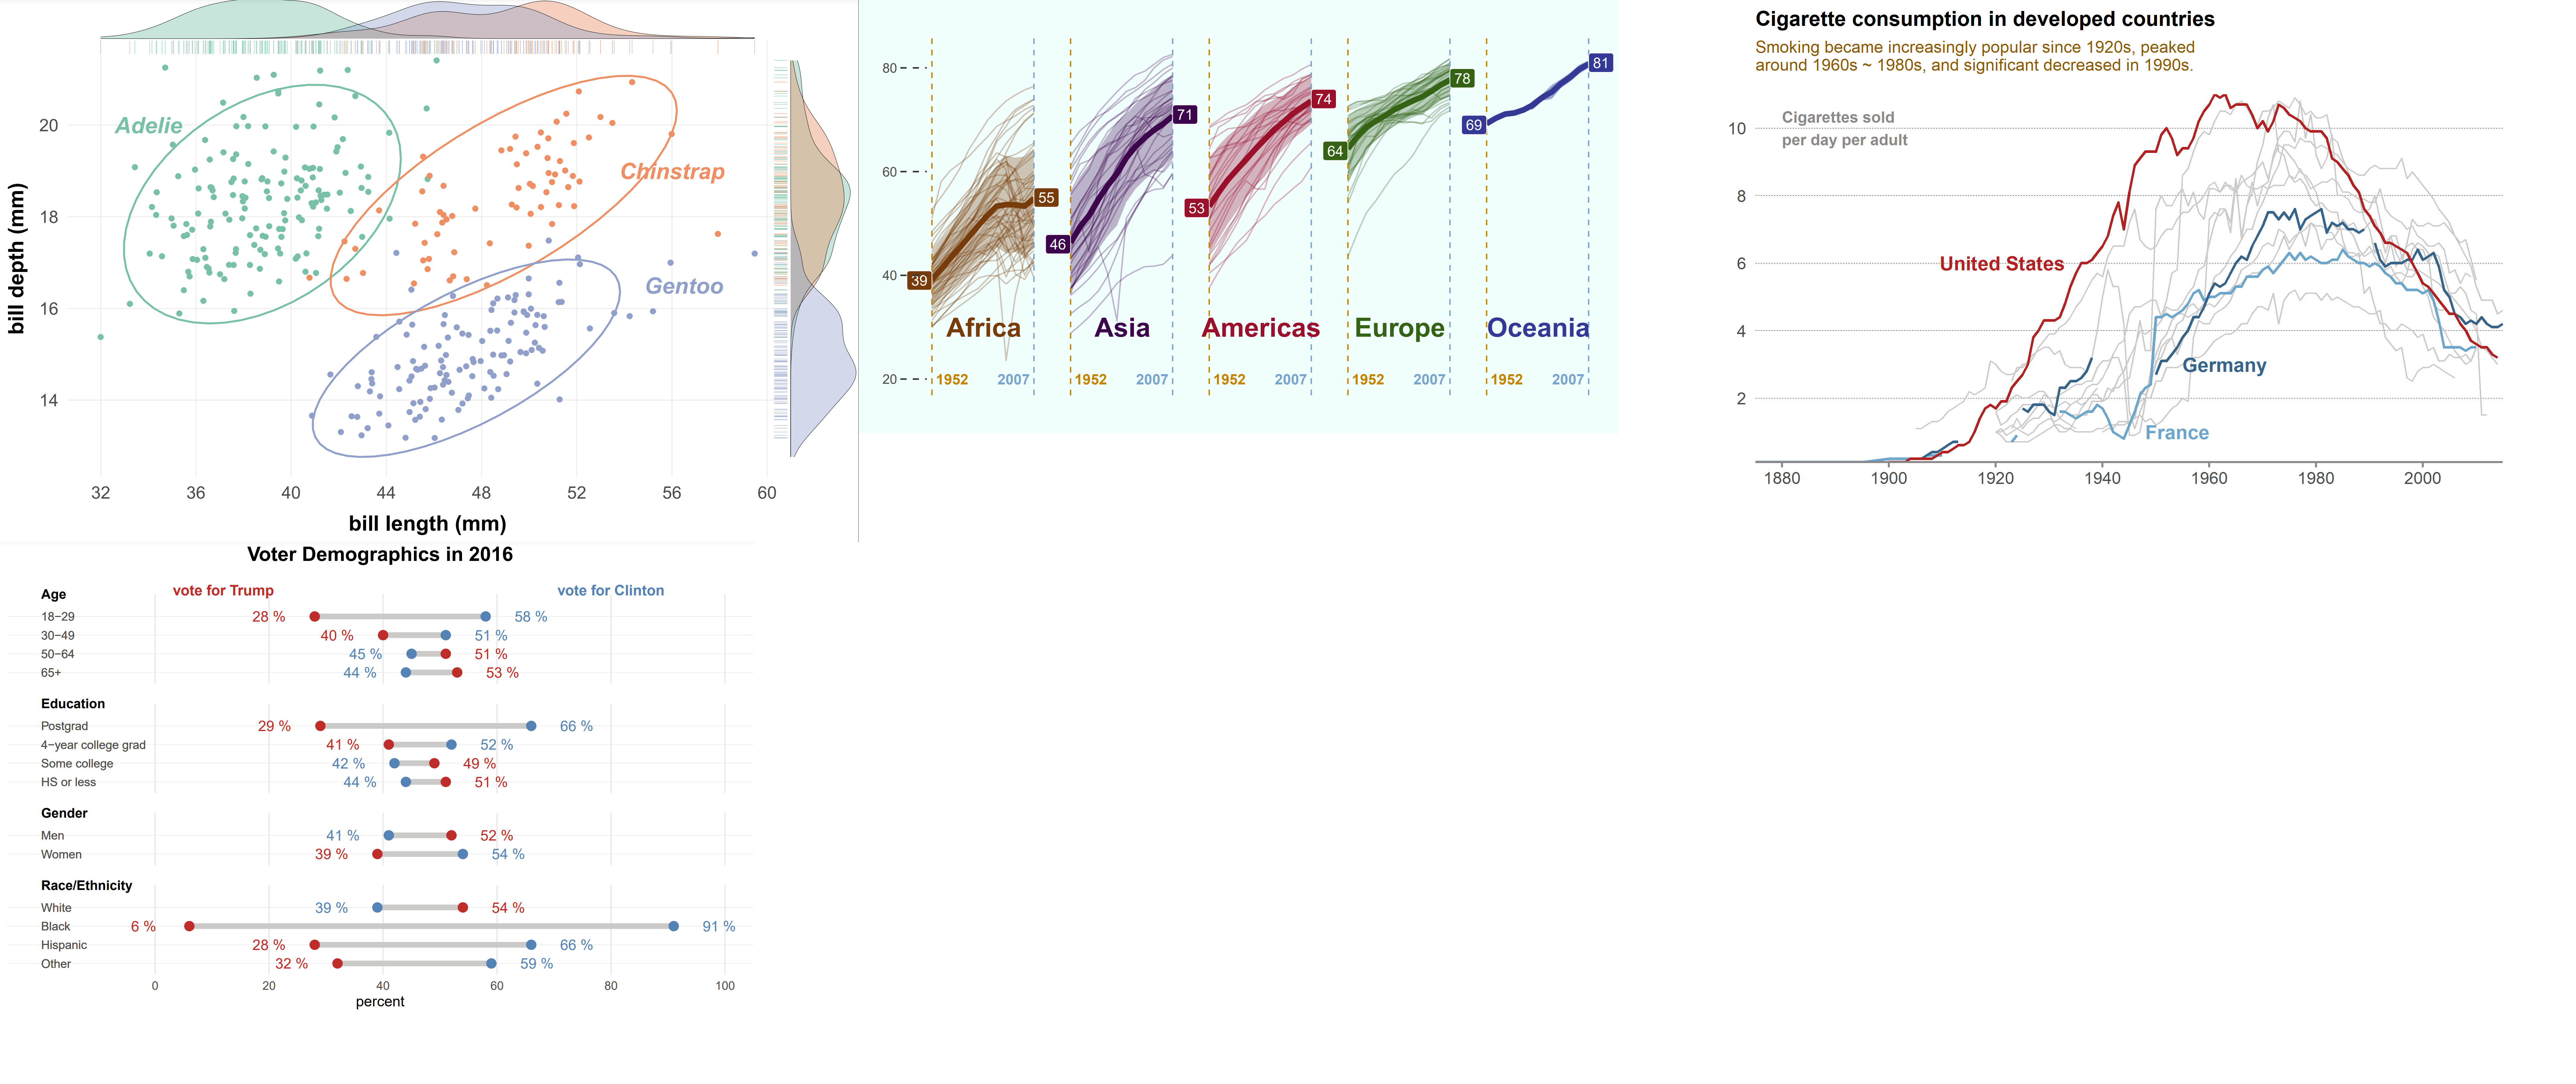

In [10]:
from IPython.display import Image as IPImage, display

display(IPImage(filename=output_file))
